Scratched area is:  66453 Square pixels
Scratched area in sq. microns is:  13456.7325 Square pixels


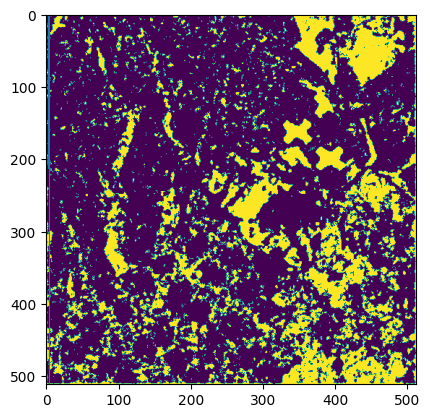

In [14]:
#Video Playlist: https://www.youtube.com/playlist?list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG

#Scratch Assay single image sgmentation

import matplotlib.pyplot as plt
from skimage import io

import numpy as np
from skimage.filters import threshold_otsu
import cv2

img = io.imread("./textury_train/tm7_1_1.png", as_gray=True)

##################################################
#Variance - not a great way to quantify texture
# from scipy import ndimage 
# k=7
# img_mean = ndimage.uniform_filter(img, (k, k))
# img_sqr_mean = ndimage.uniform_filter(img**2, (k, k))
# img_var = img_sqr_mean - img_mean**2
# plt.imshow(img_var, cmap='gray')

#######################################################
#GABOR - A great filter for texture but usually efficient
#if we know exact parameters. Good choice for generating features
#for machine learning

# ksize=45
# theta=np.pi/4
# kernel = cv2.getGaborKernel((ksize, ksize), 5.0, theta, 10.0, 0.9, 0, ktype=cv2.CV_32F)
# filtered_image = cv2.filter2D(img, cv2.CV_8UC3, kernel)
# plt.imshow(filtered_image, cmap='gray')

###########################################################
#Entropy
#Entropy quantifies disorder.
#Since cell region has high variation in pixel values the entropy would be
#higher compared to scratch region
# from skimage.filters.rank import entropy
# from skimage.morphology import disk
# entropy_img = entropy(img, disk(3))
# plt.imshow(entropy_img)

# #Scratch Analysis - single image
# #Now let us use otsu to threshold high vs low entropy regions.
plt.hist(entropy_img.flat, bins=100, range=(0,5))  #.flat returns the flattened numpy array (1D)

thresh = threshold_otsu(entropy_img)

#Now let us binarize the entropy image 
binary = entropy_img <= thresh
plt.imshow(binary)

#Sum all pixels in the scratch region (values =1)
scratch_area = np.sum(binary == 1)
print("Scratched area is: ", scratch_area, "Square pixels")

scale = 0.45 # microns/pixel
print("Scratched area in sq. microns is: ", scratch_area*((scale)**2), "Square pixels")